# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [2]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# import data 
transactions = pd.read_csv("../data/bank_transactions.csv")

transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


In [4]:
# TODO: view the shape of your data
transactions.shape

(1000000, 10)

In [5]:
# TODO: Begin your EDA
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   type            1000000 non-null  object 
 1   amount          1000000 non-null  float64
 2   nameOrig        1000000 non-null  object 
 3   oldbalanceOrg   1000000 non-null  float64
 4   newbalanceOrig  1000000 non-null  float64
 5   nameDest        1000000 non-null  object 
 6   oldbalanceDest  1000000 non-null  float64
 7   newbalanceDest  1000000 non-null  float64
 8   isFraud         1000000 non-null  int64  
 9   isFlaggedFraud  1000000 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 76.3+ MB


In [6]:
transactions.isnull().sum

<bound method DataFrame.sum of          type  amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  \
0       False   False     False          False           False     False   
1       False   False     False          False           False     False   
2       False   False     False          False           False     False   
3       False   False     False          False           False     False   
4       False   False     False          False           False     False   
...       ...     ...       ...            ...             ...       ...   
999995  False   False     False          False           False     False   
999996  False   False     False          False           False     False   
999997  False   False     False          False           False     False   
999998  False   False     False          False           False     False   
999999  False   False     False          False           False     False   

        oldbalanceDest  newbalanceDest  isFraud  isFlagg

In [7]:
transactions.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000
mean,1.796208e+05,8.351184e+05,8.565104e+05,1.102856e+06,1.227859e+06,0.001297,0.000001
std,6.076181e+05,2.892918e+06,2.928896e+06,3.464915e+06,3.752688e+06,0.035991,0.001000
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.336939e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,7.443500e+04,1.411000e+04,0.000000e+00,1.331849e+05,2.148652e+05,0.000000,0.000000
75%,2.083404e+05,1.073804e+05,1.446566e+05,9.430209e+05,1.110702e+06,0.000000,0.000000
max,9.244552e+07,3.958504e+07,3.893942e+07,3.555534e+08,3.560159e+08,1.000000,1.000000


In [8]:
transactions.duplicated().sum()

np.int64(0)

In [9]:
# Fraud class distribution
transactions['isFraud'].value_counts(normalize=True)



isFraud
0    0.998703
1    0.001297
Name: proportion, dtype: float64

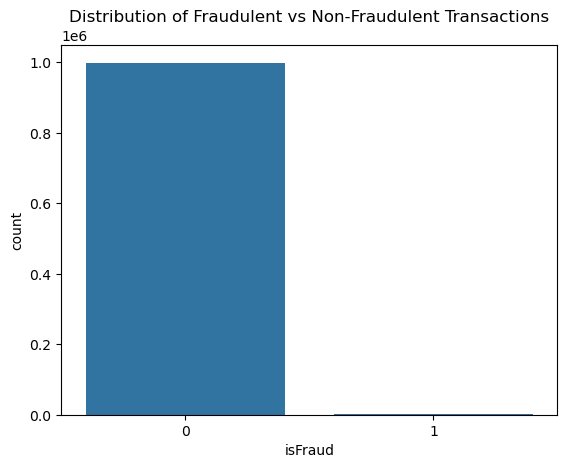

In [10]:
sns.countplot(x='isFraud', data=transactions)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()


<Axes: xlabel='type', ylabel='amount'>

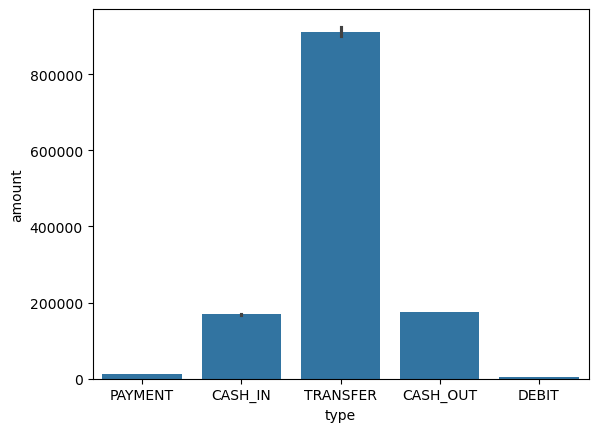

In [11]:
sns.barplot(x = transactions["type"], y = transactions["amount"])

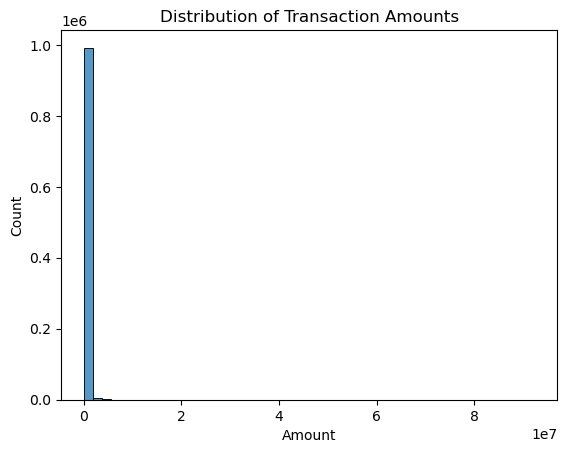

In [12]:
sns.histplot(transactions['amount'], bins=50)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()


In [13]:
transactions[['amount', 'oldbalanceOrg', 'newbalanceOrig']].skew()


amount            33.297530
oldbalanceOrg      5.253257
newbalanceOrig     5.181797
dtype: float64

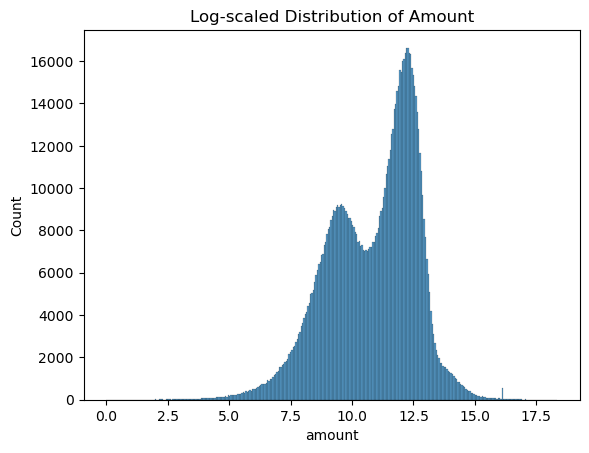

In [14]:
sns.histplot(np.log1p(transactions['amount']))
plt.title('Log-scaled Distribution of Amount')
plt.show()


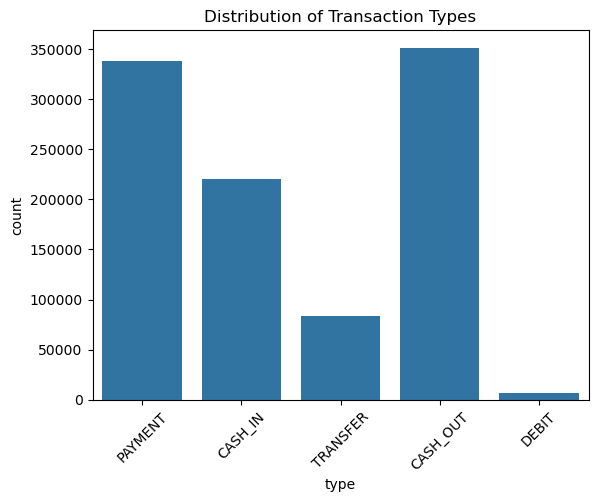

In [15]:
# Count of each transaction type
transactions['type'].value_counts()
sns.countplot(x='type', data=transactions)
plt.title('Distribution of Transaction Types')
plt.xticks(rotation=45)
plt.show()






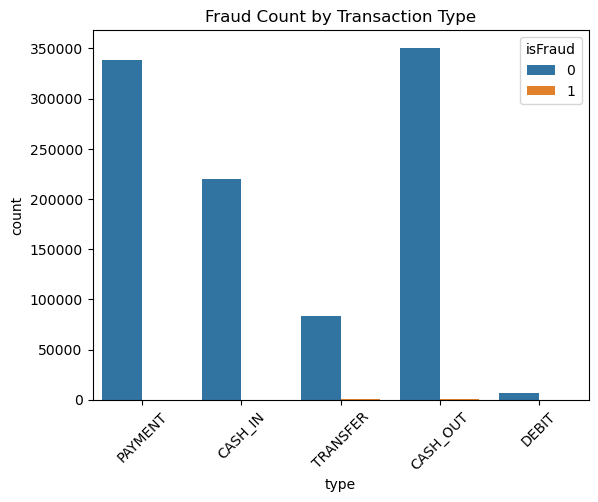

In [16]:
# Fraud by transaction type
sns.countplot(x='type', hue='isFraud', data=transactions)
plt.title('Fraud Count by Transaction Type')
plt.xticks(rotation=45)
plt.show()


In [17]:
pd.crosstab(transactions['isFlaggedFraud'], transactions['isFraud'], normalize='index')


isFraud,0,1
isFlaggedFraud,,
0,0.998704,0.001296
1,0.000000,1.000000


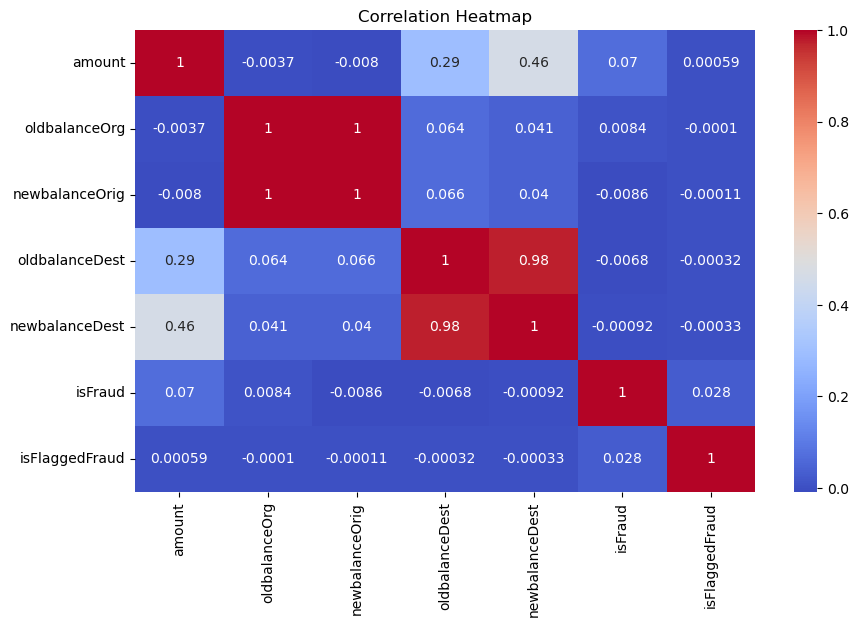

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(transactions.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.

When analyzing the numeric features in the dataset columns amount, oldbalanceOrg, and newbalanceOrig I noticed that their distributions are right-skewed. This means most of the values are small, but there are a few transactions with very large amount. I saw this from the summary statistics using transactions.describe(). The median amount showed around 74,000 and the maximum amount was over 92 million.
This was confirmed with the histogram of the amount column, which showed most transactions clustered at lower amounts with a few very high ones stretching out the distribution.

### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.

When I compared different numerical features against one another, I noticed some clear patterns related to fraudulent transactions. One of the most noticeable relationships was between the amount of the transaction and the oldbalanceOrg. Below I created a scatter plot with these two features and colored the points based on whether the transaction was fraudulent or not.

From this visualization, it became clear that many fraudulent transactions tend to cluster in specific regions. In particular, a large number of fraud cases occurred when the oldbalanceOrg was zero which suggests that fraud is often attempted when there’s no existing balance in the sender’s account. Additionally, I observed that there’s a cluster of fraudulent transactions involving high amounts, where both the transaction value and the sender's old balance are large. This could indicate that fraudsters are also targeting high-value accounts or transactions involving significant amounts of money.

In contrast, non-fraudulent transactions appeared more spread out across different values, without the same kind of concentrated patterns. These visual insights suggest that fraud tends to happen either at zero balance or during very high-value transactions, which could be useful indicators for identifying future suspicious activity.


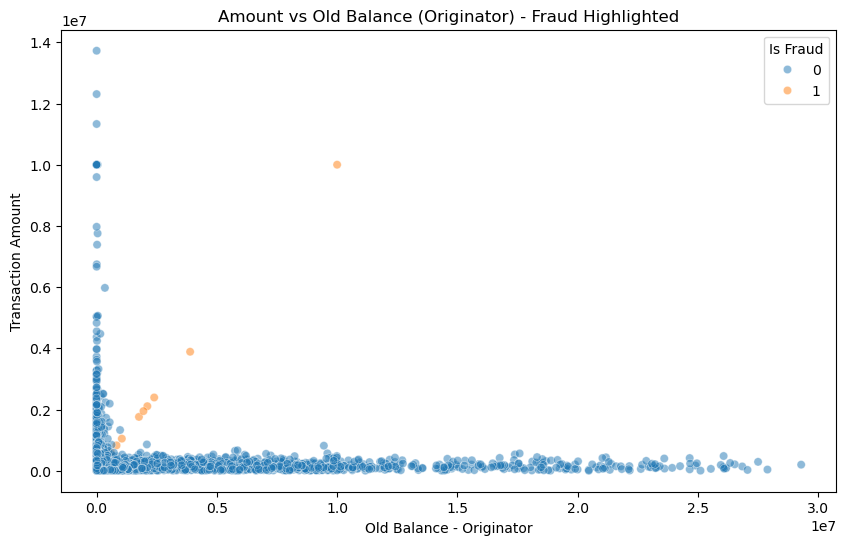

In [19]:
# Scatter plot of amount vs oldbalanceOrg, colored by fraud status
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='oldbalanceOrg', 
    y='amount', 
    hue='isFraud', 
    data=transactions.sample(10000), # use a sample if data is large
    alpha=0.5
)
plt.title('Amount vs Old Balance (Originator) - Fraud Highlighted')
plt.xlabel('Old Balance - Originator')
plt.ylabel('Transaction Amount')
plt.legend(title='Is Fraud')
plt.show()


### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

When analyzing the relationship between transaction types and their typical amounts, a clear difference emerges across categories. By summarizing the data and using visual boxplot shown below, I noticed that TRANSFER transactions tend to involve significantly larger amounts compared to other transaction types like PAYMENT, CASH_IN, CASH_OUT, AND DEBIT. Not only is the range of transaction amounts wider for TRANSFER, but there are also many more transactions in this category that involve high-value amounts, including several outliers.

In contrast, other transaction types such as DEBIT and PAYMENT tend to have more moderate or smaller transaction amounts, with less variation and fewer extreme values. This suggests that certain types of transactions are more likely to involve large sums of money, which could make them more attractive targets for fraudulent activity in later analysis.



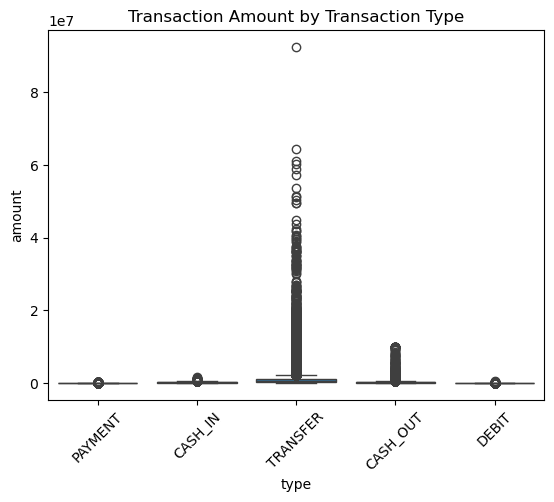

In [20]:
# Summary stats by transaction type
transactions.groupby('type')['amount'].describe()

# Boxplot to visualize
sns.boxplot(x='type', y='amount', data=transactions)
plt.title('Transaction Amount by Transaction Type')
plt.xticks(rotation=45)
plt.show()


### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

After analyzing the relationship between transaction types and fraudulent activity, I noticed a clear trend that fraudulent transactions are heavily concentrated in the TRANSFER and CASH_OUT categories. These two transaction types are the only ones consistently associated with fraud in the dataset. I confirmed this by calculating the average transaction amount by type and fraud status. While other transaction types like PAYMENT, CASH_IN, AND DEBIT show little to no fraudulent activity, TRANSFER AND CASH_OUT SHOW noticeable patterns of fraud both in frequency and the size of the amoutns involved.

To better visualize this, I used a bar chart to compare amounts by transaction type and fraud status. The bar chart made the difference very clear and easy to communicate: most fraudulent activity is happening within a small number of transaction types, which could be an important insight for building fraud detection models or setting up preventive rules. The data suggests that fraudsters are not spreading attacks across all transaction types, but rather focusing their efforts specifically on TRANSFER and CASH_OUT.

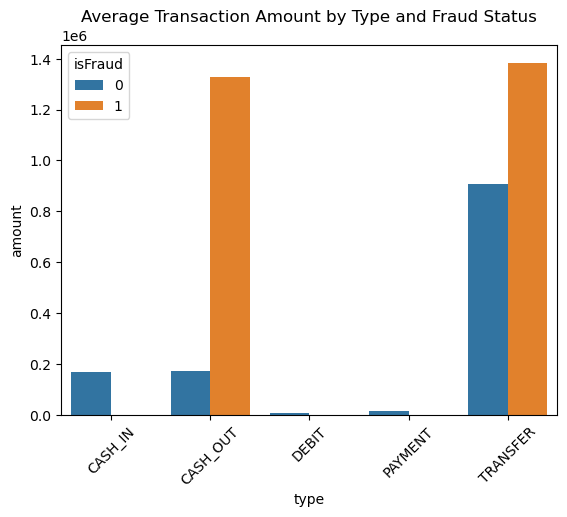

In [26]:
# Average amount by fraud status and type
transactions.groupby(['type', 'isFraud'])['amount'].mean().unstack()

avg_amount = transactions.groupby(['type', 'isFraud'])['amount'].mean().reset_index()

sns.barplot(x='type', y='amount', hue='isFraud', data=avg_amount)
plt.title('Average Transaction Amount by Type and Fraud Status')
plt.xticks(rotation=45)
plt.show()






## Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

The system's built-in fraud flag isFlaggedFraud doesn’t align well at all with actual fraudulent activity. Out of 1,297 total fraud cases in the dataset, only one was flagged by the system as shown in figures below. That’s a huge mismatch. It means that nearly all fraudulent transactions are not being detected or flagged.

What this tells me is that the current system has extremely low recall, where it’s failing to catch the majority of fraud. On the flip side, when it does flag something, it’s always right (100% precision), which shows it may be very conservative and only flags what it’s absolutely sure about. That is a huge problem because its letting almost all fraud slip through. 

The system performs very poorly in practice. It might avoid false alarms, but it does that by ignoring most of the danger. That makes it unreliable and not useful for real-world fraud prevention, where catching fraud even with some false positives is critical.

In [34]:
pd.crosstab(transactions['isFlaggedFraud'], transactions['isFraud'], normalize='index')



isFraud,0,1
isFlaggedFraud,,
0,0.998704,0.001296
1,0.000000,1.000000


In [33]:
pd.crosstab(transactions['isFlaggedFraud'], transactions['isFraud'])

isFraud,0,1
isFlaggedFraud,,
0,998703,1296
1,0,1


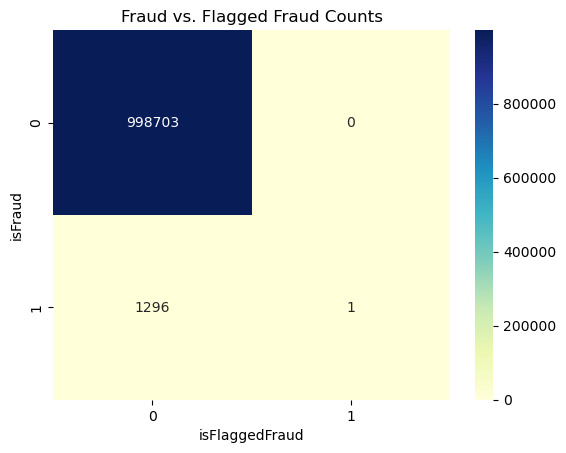

In [ ]:
crosstab = pd.crosstab(transactions['isFraud'], transactions['isFlaggedFraud'])
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Fraud vs. Flagged Fraud Counts')
plt.xlabel('isFlaggedFraud')
plt.ylabel('isFraud')
plt.show()
